<a href="https://colab.research.google.com/github/surabhi13gupta/LangChains/blob/main/prompt_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.7 MB/s eta 0:00:00


In [4]:
!pip install langchain_core

In [2]:
from google.colab import userdata
import os
github_token = userdata.get('GITHUB_TOKEN')
os.environ['GITHUB_TOKEN'] = github_token

In [3]:
endpoint = "https://models.github.ai/inference"
model_name = "openai/gpt-4o-mini"

In [5]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate

In [9]:
template = PromptTemplate(
    template="""Tell me about {topic} in 2 lines""",
    input_variables=["topic"]
)

In [11]:
prompt = template.invoke({"topic": "cat"})

In [12]:
chat_model = ChatOpenAI(
    base_url= endpoint,
    api_key=github_token,
    model=model_name,
    max_completion_tokens=100
)

In [13]:
result = chat_model.invoke(prompt)

In [14]:
result.content

'Cats are agile, independent animals known for their playful behavior and affectionate nature. They have been companions to humans for thousands of years, admired for their grace and mysterious demeanor.'

##Validate template - validate whether all placeholder are mentioned or not

In [17]:
template = PromptTemplate(
    template="""Tell me about {topic} in 2 lines""",
    validate_template=True
)

ValidationError: 1 validation error for PromptTemplate
  Value error, Input variables must be provided to validate the template. [type=value_error, input_value={'template': 'Tell me abo...'partial_variables': {}}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error

##above shows missing input variable  - i.e. placeholder is not taken care

In [18]:
template = PromptTemplate(
    template="""Tell me about {topic} in {numberoflines} lines""",
    input_variables=["topic"],
    validate_template=True
)

ValidationError: 1 validation error for PromptTemplate
  Value error, Invalid prompt schema; check for mismatched or missing input parameters from ['topic']. [type=value_error, input_value={'template': 'Tell me abo...'partial_variables': {}}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error

## again placeholder is not taken care - numberoflines are not passed

In [19]:
template_v1 = PromptTemplate(
    template="""Tell me about {topic} in 2 lines""",
    input_variables=["topic"]
)
template_v1.save("template.json")

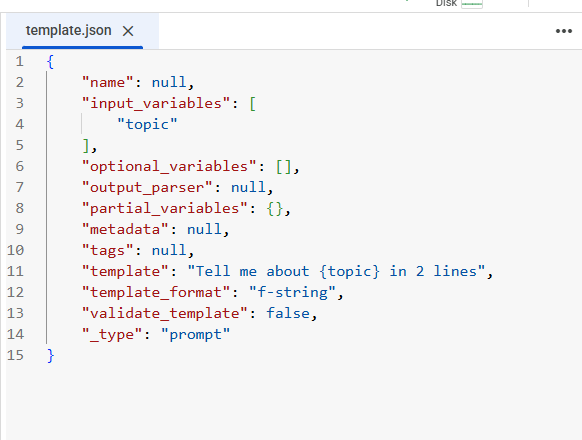

above shows the saved prompt template for reuse purpose

In [21]:
from langchain_core.prompts import load_prompt

In [26]:
template = load_prompt("template.json")
prompt = template.invoke({"topic": "dog"})

In [27]:
result = chat_model.invoke(prompt)
result.content

'Dogs are loyal and affectionate companions, known for their diverse breeds and roles, from pets to working animals. They are social creatures that thrive on human interaction and provide emotional support and protection.'

## Using langchain now

In [29]:
chain = template | chat_model

In [30]:
result = chain.invoke({"topic": "dog"})
result.content

'Dogs are loyal and affectionate companions known for their playful nature and strong bond with humans. They serve various roles, from family pets to working animals, providing companionship, protection, and assistance.'